/var/folders/jh/_03qbqf130l8hjh8rpc6f4_c0000gn/T/ipykernel_6505/3404529780.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


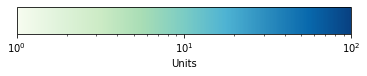

In [135]:
import matplotlib.pyplot as plt
import matplotlib as mpl

fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

GnBu = mpl.cm.GnBu
logscale = mpl.colors.LogNorm(vmin=1, vmax=100)

cb1 = mpl.colorbar.ColorbarBase(ax, cmap=GnBu,
                                norm=logscale,
                                orientation='horizontal')
cb1.set_label('Units')
fig.show()

In [134]:
from matplotlib.colors import to_hex
import json
import urllib


numvalues = 100
max_precip = 85
cmap = mpl.cm.GnBu
hexcmap = [to_hex(c) for c in cmap(np.logspace(0, max_precip, numvalues))]
cmap_dict = {int(idx/numvalues * 255): v for idx, v in enumerate(hexcmap)}

#cmap_dict
cmap_params = urllib.parse.urlencode({
    "colormap": json.dumps(cmap_dict)
})


In [133]:
url = 'https://staging-raster.delta-backend.com/cog/preview?url=s3://climatedashboard-data/GPM_3IMERGHHE/3B-HHR-E.MS.MRG.3IMERG.20210101-S000000-E002959.0000.V06B.tif&rescale=0,100&'
print(f'{url}{cmap_params}')

https://staging-raster.delta-backend.com/cog/preview?url=s3://climatedashboard-data/GPM_3IMERGHHE/3B-HHR-E.MS.MRG.3IMERG.20210101-S000000-E002959.0000.V06B.tif&rescale=0,100&colormap=%7B%220%22%3A+%22%23084081%22%2C+%222%22%3A+%22%23084081%22%2C+%225%22%3A+%22%23084081%22%2C+%227%22%3A+%22%23084081%22%2C+%2210%22%3A+%22%23084081%22%2C+%2212%22%3A+%22%23084081%22%2C+%2215%22%3A+%22%23084081%22%2C+%2217%22%3A+%22%23084081%22%2C+%2220%22%3A+%22%23084081%22%2C+%2222%22%3A+%22%23084081%22%2C+%2225%22%3A+%22%23084081%22%2C+%2228%22%3A+%22%23084081%22%2C+%2230%22%3A+%22%23084081%22%2C+%2233%22%3A+%22%23084081%22%2C+%2235%22%3A+%22%23084081%22%2C+%2238%22%3A+%22%23084081%22%2C+%2240%22%3A+%22%23084081%22%2C+%2243%22%3A+%22%23084081%22%2C+%2245%22%3A+%22%23084081%22%2C+%2248%22%3A+%22%23084081%22%2C+%2251%22%3A+%22%23084081%22%2C+%2253%22%3A+%22%23084081%22%2C+%2256%22%3A+%22%23084081%22%2C+%2258%22%3A+%22%23084081%22%2C+%2261%22%3A+%22%23084081%22%2C+%2263%22%3A+%22%23084081%22%2C+%2266%22%3A+